In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from get_data.get_data import get_titanic_summary_data

In [3]:
def plot_bars_dodge(
    ax: plt.Axes, x: np.ndarray[int], y_data: pd.DataFrame, space_width=0.3
):
    nbars = y_data.shape[1]
    width = (1 - space_width) / nbars
    for i, col in enumerate(y_data.columns):
        ax.bar(
            x=[x2 - 0.5 + space_width / 2 + width / 2 + width * i for x2 in x],
            height=y_data[col],
            width=width,
            label=col,
        )

In [4]:
def plot_barhs_dodge(
    ax: plt.Axes, y: np.ndarray[int], x_data: pd.DataFrame, space_width=0.3
):
    nbars = x_data.shape[1]
    height = (1 - space_width) / nbars
    for i, col in enumerate(x_data.columns):
        ax.barh(
            y=[y2 - 0.5 + space_width / 2 + height / 2 + height * i for y2 in y],
            width=x_data[col],
            height=height,
            label=col,
        )

### data

In [10]:
pdf = get_titanic_summary_data()

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True
         age_bin   n  survival_rate  survival_rate_man  survival_rate_woman  survival_rate_child
0  (0.419, 14.0]  77       0.584416                NaN                  NaN             0.584416
1   (14.0, 19.0]  87       0.390805           0.102041    

### dodge bars first principle

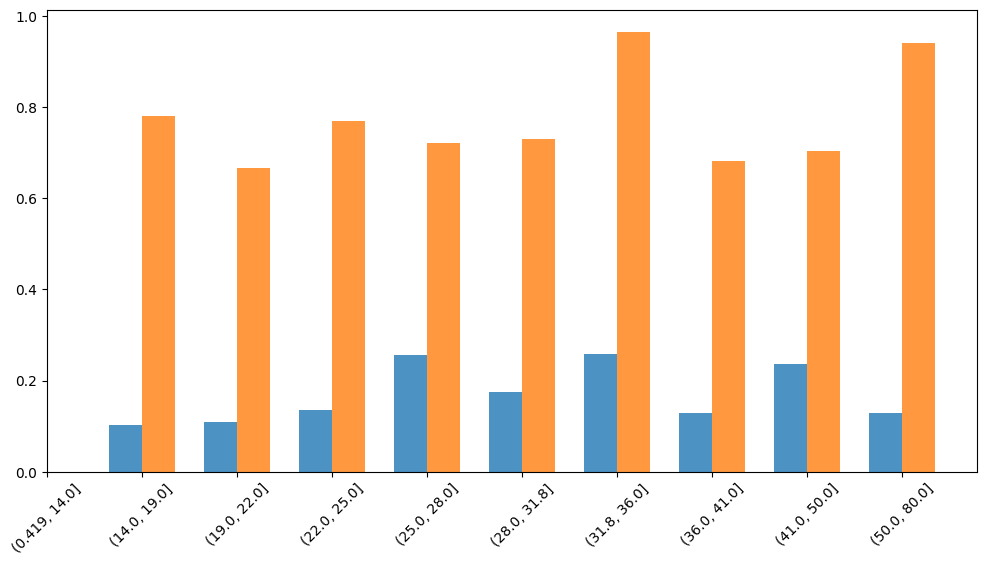

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pdf["age_bin"]))
width = 0.35

ax.bar(
    x - width / 2,
    pdf["survival_rate_man"],
    width=width,
    alpha=0.8,
    label="Survival Rate 1",
)
ax.bar(
    x + width / 2,
    pdf["survival_rate_woman"],
    width=width,
    alpha=0.8,
    label="Survival Rate 2",
)

_ = ax.set_xticks(x, labels=pdf["age_bin"].astype(str), rotation=45)

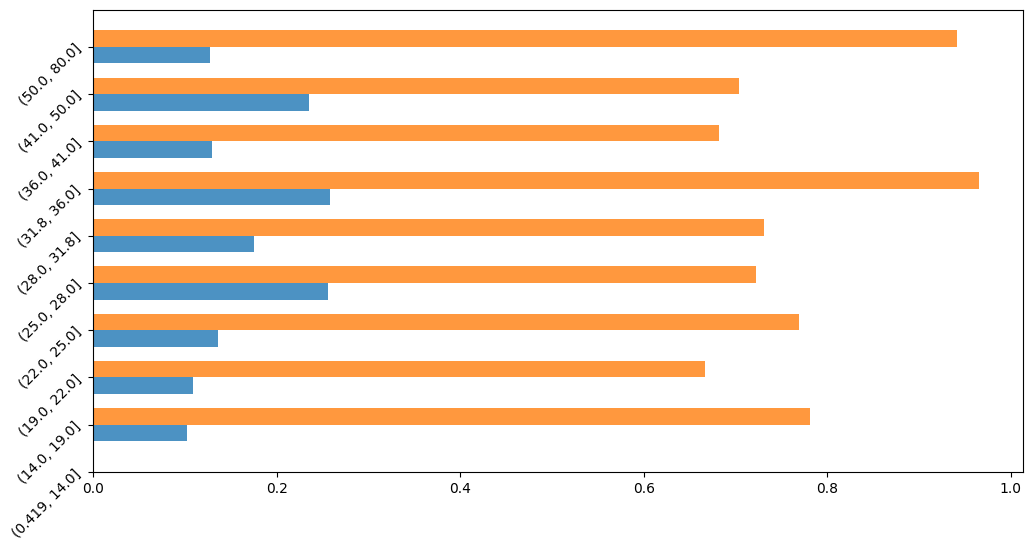

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

y = np.arange(len(pdf["age_bin"]))
height = 0.35

ax.barh(
    y - height / 2,
    pdf["survival_rate_man"],
    height=height,
    alpha=0.8,
    label="Survival Rate 1",
)
ax.barh(
    y + height / 2,
    pdf["survival_rate_woman"],
    height=height,
    alpha=0.8,
    label="Survival Rate 2",
)

_ = ax.set_yticks(y, labels=pdf["age_bin"].astype(str), rotation=45)

### content

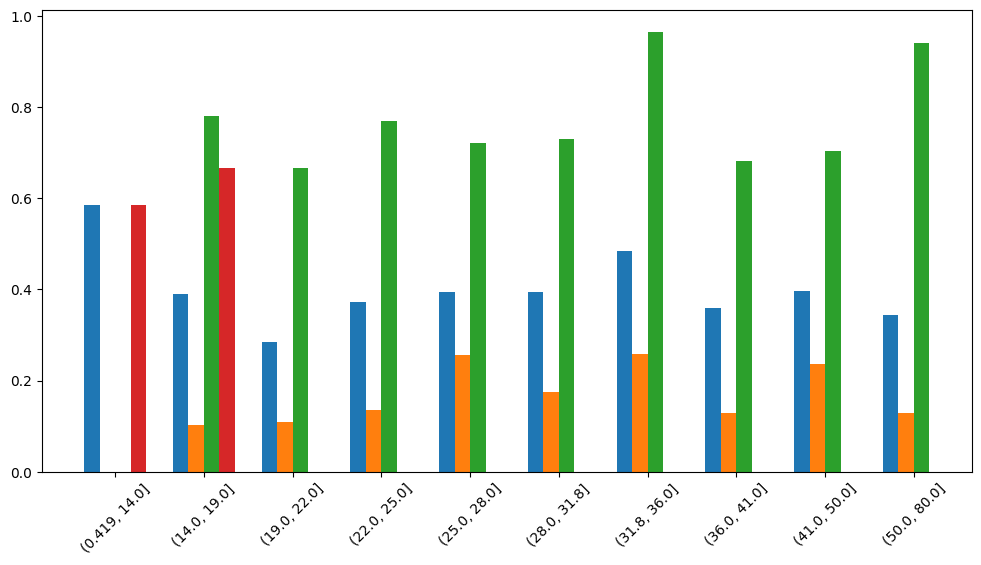

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

x = np.arange(pdf.shape[0])
plot_bars_dodge(
    ax,
    x=x,
    y_data=pdf[
        [
            "survival_rate",
            "survival_rate_man",
            "survival_rate_woman",
            "survival_rate_child",
        ]
    ],
)
x_ticklabels = pdf["age_bin"].astype(str)
_ = ax.set_xticks(x, labels=x_ticklabels, rotation=45)

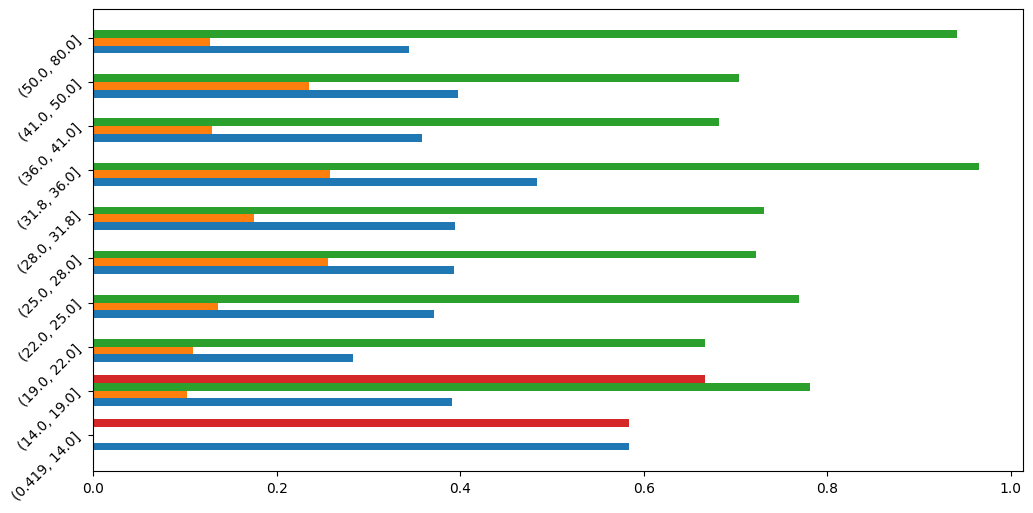

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

y = np.arange(pdf.shape[0])
plot_barhs_dodge(
    ax,
    y=y,
    x_data=pdf[
        [
            "survival_rate",
            "survival_rate_man",
            "survival_rate_woman",
            "survival_rate_child",
        ]
    ],
)
y_ticklabels = pdf["age_bin"].astype(str)
_ = ax.set_yticks(y, labels=y_ticklabels, rotation=45)